<a href="https://colab.research.google.com/github/TomasKricka/MPA-MLF/blob/main/pc7/pc7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD, RMSprop, Adamax, Adagrad, Ftrl

from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import os
import zipfile

from keras.backend import clear_session

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<function matplotlib.pyplot.show(close=None, block=None)>

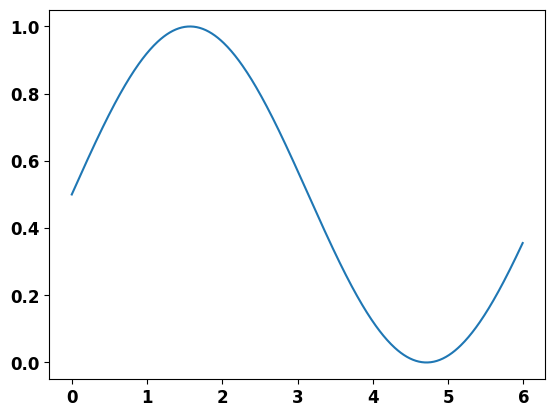

In [108]:
start_t = 0
end_t = 6
sample_r = 100
time = np.arange(start_t, end_t, (1/sample_r))

sin_amp = (np.sin(time)+1)/2



plt.figure()
plt.plot(time, sin_amp)
plt.show

In [109]:
#x_train, x_test, y_train, y_test = train_test_split(time,sin_amp, test_size=0.2)
df = pd.DataFrame(time)
row_numb = df.shape[0]

time_res = time.reshape ((row_numb,1))

df = pd.DataFrame(sin_amp)
row_numb = df.shape[0]

sin_amp_res = sin_amp.reshape ((row_numb,1))

print(time_res.shape)
print(sin_amp_res.shape)

(600, 1)
(600, 1)


In [142]:
model = Sequential()
model.add(Dense(10,input_shape=(1, ),activation='sigmoid'))      
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

#model.summary()

In [143]:
optimizer = SGD(learning_rate = 0.2)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
     

In [144]:
history = model.fit(time_res, sin_amp_res, epochs=10, batch_size=16, validation_split = 0.2)

#history = model.fit(time_res, sin_amp_res, epochs=10)


Epoch 1/10
30/30 [==============================] - 1s 9ms/step - loss: 0.1165 - accuracy: 0.0000e+00 - val_loss: 0.1719 - val_accuracy: 0.0000e+00
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0902 - accuracy: 0.0000e+00 - val_loss: 0.0552 - val_accuracy: 0.0000e+00
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0576 - accuracy: 0.0000e+00 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.0000e+00 - val_loss: 0.0173 - val_accuracy: 0.0000e+00
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.0000e+00 - val_loss: 0.0194 - val_accuracy: 0.0000e+00
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.0000e+00 - val_loss: 0.0221 - val_accuracy: 0.0000e+00
Epoch 7/10
30/30 [==============================] - 0s 5ms/step - loss: 0.0267 - accuracy: 0.0000e+00 - val_loss

19/19 [==============================] - 0s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

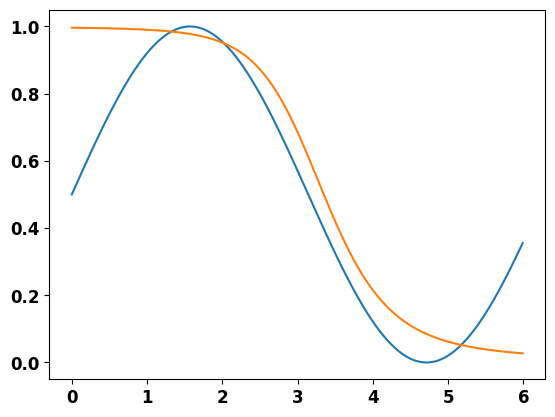

In [145]:
pred_val = model.predict(time_res)

plt.figure()
plt.plot(time, sin_amp, time, pred_val)

plt.show